In [151]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)

In [3]:
## Results tables for different sparsity levels
cifar10Res = Path('../results/Experiment5')
cifar100Res = Path('../results/Experiment6')

In [5]:
# Get average result files from each
cifar10files = cifar10Res.glob('*avg.txt')
cifar10files = [f for f in cifar10files]
cifar100files = cifar100Res.glob('*avg.txt')
cifar100files = [f for f in cifar100files]

In [127]:
# For each file in cifar10
c10results = {k:None for k in range(10,100, 10)}
for f in cifar10files:
    sparsity = int(str(f.stem).split('_')[1][-2:])
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparsity] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparsity].append(val)
# For each file in cifar100
c100results = {k:None for k in range(10,100, 10)}
for f in cifar100files:
    sparsity = int(str(f.stem).split('_')[1][-2:])
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparsity] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparsity].append(val)             

In [128]:
# Create table
resTable = pd.DataFrame()
resTable['Sparsity'] = list(c10results.keys())
resTable['Cifar10'] = [f'{v1}({v2})' for v1, v2 in list(c10results.values())]
resTable['Cifar100'] = [f'{v1}({v2})' for v1, v2 in list(c100results.values())]

In [130]:
dataResTable = pd.DataFrame()
dataResTable['Sparsity'] = list(c10results.keys())
dataResTable['Cifar10'] = [v1 for v1, v2 in list(c10results.values())]
dataResTable['Cifar100'] = [v1 for v1, v2 in list(c100results.values())]

In [129]:
resTable

,Sparsity,Cifar10,Cifar100
0,10,82.09(1.66),49.7(2.78)
1,20,83.6(1.03),48.45(5.03)
2,30,82.25(0.79),47.65(2.69)
3,40,83.7(1.23),48.89(1.08)
4,50,83.4(0.5),48.55(1.78)
5,60,83.41(0.54),51.32(1.13)
6,70,82.44(1.41),48.49(0.69)
7,80,82.15(1.11),49.94(0.95)
8,90,82.69(0.56),50.38(1.23)


In [132]:
dataResTable

,Sparsity,Cifar10,Cifar100
0,10,82.09,49.70
1,20,83.60,48.45
2,30,82.25,47.65
3,40,83.70,48.89
4,50,83.40,48.55
5,60,83.41,51.32
6,70,82.44,48.49
7,80,82.15,49.94
8,90,82.69,50.38


In [131]:
resTable.to_csv('sparsity_levels_results.csv')
dataResTable.to_csv('sparsity_levels_results_data.csv')

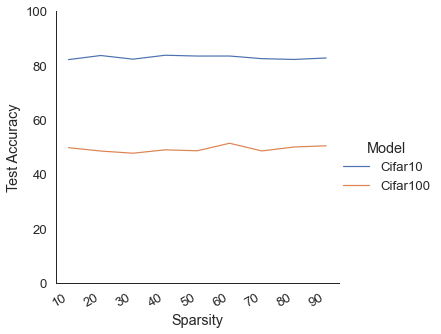

In [152]:
g = sns.relplot(x='Sparsity', y = 'value', hue='variable', kind="line", data=pd.melt(dataResTable, ['Sparsity']))
g.set(ylim=(0,100), ylabel='Test Accuracy', xticks = list(dataResTable['Sparsity']))
g._legend.set_title('Model')
g.figure.autofmt_xdate()

In [154]:
g.savefig("sparsity_levels_figure.png") 

In [111]:
# Get all results folders relevant to this experiment
results = Path('../results')
folders = [f for f in results.glob('*Experiment*')]
folders = [f for f in folders if str(f.stem)[-1] in ['1', '2', '3', '4']]
files = [f.glob('*avg*') for f in folders]
files = [f for file in files for f in file]
c10Files = [f for f in files if 'R18' in str(f)]
c100Files = [f for f in files if 'R34' in str(f)]

In [115]:

c10results = {'sparse': {0: None, 20: None, 50: None, 80: None, 90: None, 'asym': None}, 'dense': {0: None, 20: None, 50: None, 80: None, 90: None, 'asym': None}}

for f in c10Files:
    noise = 'asym' if 'asym' in str(f) else int(str(f.stem).split('_')[-3][:-3])
    sparse = 'sparse' if 'sparse' in str(f).lower() else 'dense'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparse][noise] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparse][noise].append(val)
                
c100results = {'sparse': {0: None, 20: None, 50: None, 80: None, 90: None, 'asym': None}, 'dense': {0: None, 20: None, 50: None, 80: None, 90: None, 'asym': None}}

for f in c100Files:
    noise = 'asym' if 'asym' in str(f) else int(str(f.stem).split('_')[-3][:-3])
    sparse = 'sparse' if 'sparse' in str(f).lower() else 'dense'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparse][noise] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparse][noise].append(val)
                
# Create Cifar10 tables
c10results = {k: {k2:[f'{c10results[k][k2][0]}({c10results[k][k2][1]})'] for k2 in c10results[k]} for k in c10results}
c10sparseRow = pd.DataFrame.from_dict(c10results['sparse'])
c10denseRow = pd.DataFrame.from_dict(c10results['dense'])
c10resTable = pd.concat([c10sparseRow, c10denseRow])
c10resTable['Model'] = ['20% ResNet18', 'ResNet18']
c10resTable = c10resTable.set_index('Model')

# Create Cifar100 tables
c100results = {k: {k2:[f'{c100results[k][k2][0]}({c100results[k][k2][1]})'] for k2 in c100results[k]} for k in c100results}
c100sparseRow = pd.DataFrame.from_dict(c100results['sparse'])
c100denseRow = pd.DataFrame.from_dict(c100results['dense'])
c100resTable = pd.concat([c100sparseRow, c100denseRow])
c100resTable['Model'] = ['20% ResNet18', 'ResNet18']
c100resTable = c100resTable.set_index('Model')

In [118]:
c10resTable.to_csv('cifar10_initial_results.csv')

In [120]:
c10resTable

,0,20,50,80,90,asym
Model,,,,,,
20% ResNet18,92.31(0.42),83.03(1.45),73.35(1.22),50.12(2.8),32.36(0.76),77.7(2.67)
ResNet18,92.28(0.83),82.44(0.37),72.89(3.09),45.64(2.3),30.76(1.08),80.65(0.15)


In [119]:
c100resTable.to_csv('cifar100_initial_results.csv')

In [121]:
c100resTable

,0,20,50,80,90,asym
Model,,,,,,
20% ResNet18,70.23(0.75),52.29(1.03),32.4(1.86),11.25(1.06),2.77(1.13),38.62(1.63)
ResNet18,69.71(0.62),48.22(1.5),32.81(3.08),10.3(0.66),2.9(1.46),38.07(2.09)
